In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from queue import PriorityQueue
import heapq
from collections import deque


Ingrese la opción correcta de grafo que desea insertar:
    1) Grafo dirigido
    2) Grafo no dirigido
     2
Ingrese el número de nodos:  10
Ingrese el nombre del nodo 1:  A
Ingrese el nombre del nodo 2:  B
Ingrese el nombre del nodo 3:  C
Ingrese el nombre del nodo 4:  D
Ingrese el nombre del nodo 5:  E
Ingrese el nombre del nodo 6:  F
Ingrese el nombre del nodo 7:  G
Ingrese el nombre del nodo 8:  H
Ingrese el nombre del nodo 9:  I
Ingrese el nombre del nodo 10:  J
Ingrese el número de aristas:  12
Ingrese el nodo de origen para la arista 1:  A
Ingrese el nodo de destino para la arista 1:  B
Ingrese el peso para la arista (A <-> B):  1
Ingrese el nodo de origen para la arista 2:  A
Ingrese el nodo de destino para la arista 2:  C
Ingrese el peso para la arista (A <-> C):  4
Ingrese el nodo de origen para la arista 3:  B
Ingrese el nodo de destino para la arista 3:  D
Ingrese el peso para la arista (B <-> D):  5
Ingrese el nodo de origen para la arista 4:  B
Ingrese el nodo de destino

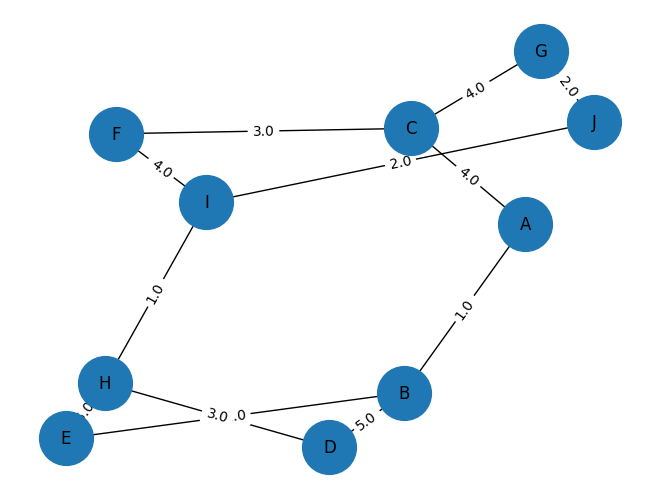

Ingrese la operación que desea realizar en el grafo:
    1) Mostrar el grafo
    5) Realizar un recorrido BFS
    6) Realizar un recorrido DFS
    0) Salir
     5
Ingrese el nodo de inicio para BFS:  A


Recorrido BFS: [('A', 'B'), ('A', 'C'), ('B', 'D'), ('B', 'E'), ('C', 'F'), ('C', 'G'), ('D', 'H'), ('F', 'I'), ('G', 'J')]


Ingrese la operación que desea realizar en el grafo:
    1) Mostrar el grafo
    5) Realizar un recorrido BFS
    6) Realizar un recorrido DFS
    0) Salir
     6
Ingrese el nodo de inicio para DFS:  J


Recorrido DFS: [('J', 'G'), ('G', 'C'), ('C', 'A'), ('A', 'B'), ('B', 'D'), ('D', 'H'), ('H', 'E'), ('H', 'I'), ('I', 'F')]


Ingrese la operación que desea realizar en el grafo:
    1) Mostrar el grafo
    5) Realizar un recorrido BFS
    6) Realizar un recorrido DFS
    0) Salir
     0


In [3]:
def crear_grafo(tipo):
    if tipo == 1:
        G = nx.DiGraph()
    elif tipo == 2:
        G = nx.Graph()
    else:
        raise ValueError("Tipo de grafo no válido. Debe ser 1 (dirigido) o 2 (no dirigido).")

    nodos = []

    # Pedir al usuario ingresar los nodos
    num_nodos = int(input("Ingrese el número de nodos: "))
    for i in range(num_nodos):
        nodo = input(f"Ingrese el nombre del nodo {i + 1}: ").upper()
        nodos.append(nodo)
        G.add_node(nodo)

    # Pedir al usuario ingresar las aristas con pesos
    num_aristas = int(input("Ingrese el número de aristas: "))
    for i in range(num_aristas):
        origen = input(f"Ingrese el nodo de origen para la arista {i + 1}: ").upper()
        destino = input(f"Ingrese el nodo de destino para la arista {i + 1}: ").upper()
        peso = float(input(f"Ingrese el peso para la arista ({origen} {'->' if tipo == 1 else '<->'} {destino}): "))
        G.add_edge(origen, destino, weight=peso)

    return G, nodos

def mostrar_grafo(G):
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=1500)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, font_size=10, edge_labels=edge_labels)
    plt.show()


def bfs(G, inicio):
    return list(nx.bfs_edges(G, inicio))

def dfs(G, inicio):
    return list(nx.dfs_edges(G, inicio))


while True:
    tipo = int(input("""Ingrese la opción correcta de grafo que desea insertar:
    1) Grafo dirigido
    2) Grafo no dirigido
    """))

    if tipo == 1 or tipo == 2:
        break
    else:
        print("Opción no válida. Por favor, seleccione una opción válida.")

grafo, nodos = crear_grafo(tipo)

# Aquí puedes implementar un menú para ejecutar diferentes operaciones en el grafo
# Por ejemplo:
while True:
    operacion = input("""Ingrese la operación que desea realizar en el grafo:
    1) Mostrar el grafo
    5) Realizar un recorrido BFS
    6) Realizar un recorrido DFS
    0) Salir
    """)

    if operacion == '1':
        mostrar_grafo(grafo)
        
    elif operacion == '5':
        inicio = input("Ingrese el nodo de inicio para BFS: ").upper()
        try:
            print("Recorrido BFS:", bfs(grafo, inicio))
        except:
            print("Verifique el dato ingresado")
            
    elif operacion == '6':
        inicio = input("Ingrese el nodo de inicio para DFS: ").upper()
        try:
            print("Recorrido DFS:", dfs(grafo, inicio))
        except:
            print("Verifique el dato ingresado")
            
    elif operacion == '0':
        break
    else:
        print("Operación no válida. Por favor, seleccione una opción válida.")



In [2]:
def bfs(isla, inicio, tesoro):
    filas, columnas = len(isla), len(isla[0])
    visitados = set()
    cola = deque([(inicio, 0)])

    movimientos = [(0, 1), (1, 0), (0, -1), (-1, 0)]

    while cola:
        (x, y), distancia = cola.popleft()

        if (x, y) == tesoro:
            return distancia

        for mov in movimientos:
            nuevo_x, nuevo_y = x + mov[0], y + mov[1]

            if 0 <= nuevo_x < filas and 0 <= nuevo_y < columnas and isla[nuevo_x][nuevo_y] == 0 and (nuevo_x, nuevo_y) not in visitados:
                visitados.add((nuevo_x, nuevo_y))
                cola.append(((nuevo_x, nuevo_y), distancia + 1))

    return "no hay camino"

In [3]:
laberinto = [
    [0, 0, 1, 0],
    [0, 1, 0, 0],
    [0, 0, 0, 0],
    [1, 0, 1, 0]
]

inicio = (0, 0) 
tesoro = (0, 3)  

distancia_minima = bfs(laberinto, inicio, tesoro)
print("La distancia mínima para salir del laberinto es:", distancia_minima)

La distancia mínima para salir del laberinto es: 7


In [4]:
def dfs(isla, inicio, tesoro):
    filas, columnas = len(isla), len(isla[0])
    visitados = set()
    pila = [(inicio, 0)]  

    movimientos = [(0, 1), (1, 0), (0, -1), (-1, 0)]  

    while pila:
        (x, y), distancia = pila.pop() 

        if (x, y) == tesoro:
            return distancia

        visitados.add((x, y))

        for mov in movimientos:
            nuevo_x, nuevo_y = x + mov[0], y + mov[1]

            if 0 <= nuevo_x < filas and 0 <= nuevo_y < columnas and isla[nuevo_x][nuevo_y] == 0:
                if (nuevo_x, nuevo_y) not in visitados:
                    pila.append(((nuevo_x, nuevo_y), distancia + 1))

    return "no hay camino"

In [5]:
isla = [
    [0, 0, 1, 0],
    [0, 1, 0, 0],
    [0, 0, 1, 0],
    [1, 0, 1, 0]
]

inicio = (0, 0)  # Posición de inicio
tesoro = (3, 3)  # Posición del tesoro


distancia = dfs(isla, inicio, tesoro)
print("La distancia más corta al tesoro es:", distancia)

La distancia más corta al tesoro es: no hay camino


In [6]:
def mostrar_grafo(G):
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=1500)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, font_size=10, edge_labels=edge_labels)
    plt.show()
    
def visualizar_resultado(G, path, title="Resultado"):
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=1500)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, font_size=10, edge_labels=edge_labels)
    
    if path:
        edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color='r', width=2)

    plt.title(title)
    plt.show()

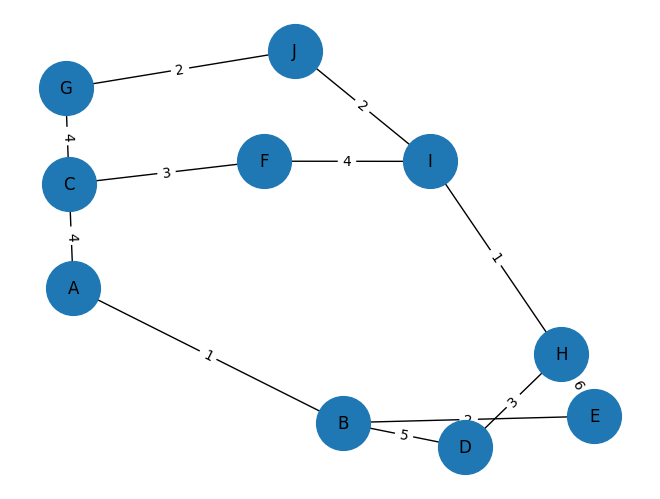

Uniform Cost Search: ['A', 'B', 'E'] Costo: 3


In [7]:
def uniform_cost_search(grafo, inicio, objetivo):
    cola_prioridad = [(0, inicio)]
    visitados = set()
    costos = {inicio: 0}
    padres = {inicio: None}

    while cola_prioridad:
        costo_actual, nodo_actual = heapq.heappop(cola_prioridad)

        if nodo_actual in visitados:
            continue

        visitados.add(nodo_actual)

        if nodo_actual == objetivo:
            camino = []
            while nodo_actual is not None:
                camino.append(nodo_actual)
                nodo_actual = padres[nodo_actual]
            camino.reverse()
            return camino, costo_actual

        for vecino in grafo.neighbors(nodo_actual):
            nuevo_costo = costo_actual + grafo[nodo_actual][vecino]['weight']
            
            if vecino not in visitados and (vecino not in costos or nuevo_costo < costos[vecino]):
                costos[vecino] = nuevo_costo
                padres[vecino] = nodo_actual
                heapq.heappush(cola_prioridad, (nuevo_costo, vecino))

    return None, float('inf')

G = nx.Graph()
edges = [('A', 'B', 1), ('A', 'C', 4), ('B', 'D', 5), ('B', 'E', 2),
        ('C', 'F', 3), ('C', 'G', 4), ('D', 'H', 3), ('E', 'H', 6),
        ('F', 'I', 4), ('G', 'J', 2), ('H', 'I', 1), ('I', 'J', 2)]
G.add_weighted_edges_from(edges)
mostrar_grafo(G)

path, cost = uniform_cost_search(G, 'A', 'E')
print("Uniform Cost Search:", path, "Costo:", cost)

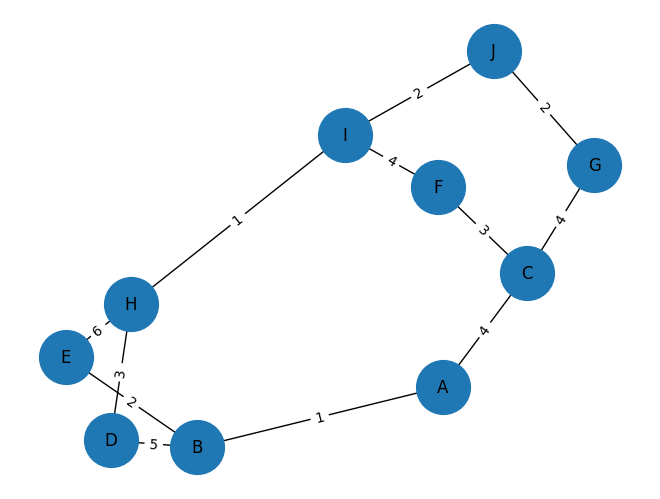

Greedy Search: ['A', 'C', 'G', 'J']


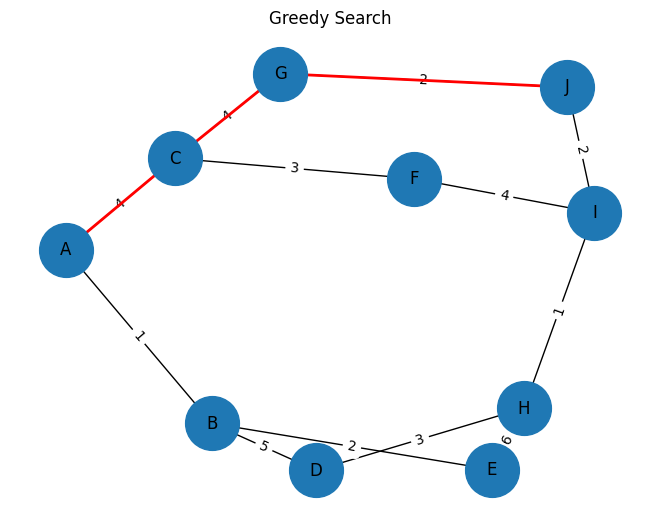

In [8]:
def greedy_search(G, start, goal, heuristic):
    visited = set()
    queue = PriorityQueue()
    queue.put((heuristic[start], start, []))

    while not queue.empty():
        (_, node, path) = queue.get()

        if node in visited:
            continue

        visited.add(node)
        path = path + [node]

        if node == goal:
            return path

        for neighbor in G.neighbors(node):
            queue.put((heuristic[neighbor], neighbor, path))

    return None
    
G = nx.Graph()
edges = [('A', 'B', 1), ('A', 'C', 4), ('B', 'D', 5), ('B', 'E', 2), 
         ('C', 'F', 3), ('C', 'G', 4), ('D', 'H', 3), ('E', 'H', 6), 
         ('F', 'I', 4), ('G', 'J', 2), ('H', 'I', 1), ('I', 'J', 2)]
G.add_weighted_edges_from(edges)

mostrar_grafo(G)

heuristica = {
    'A': 7, 'B': 6, 'C': 3, 'D': 5, 'E': 4,
    'F': 2, 'G': 1, 'H': 3, 'I': 1, 'J': 0
}
path = greedy_search(G, 'A', 'J', heuristica)
print("Greedy Search:", path)
visualizar_resultado(G, path, "Greedy Search")

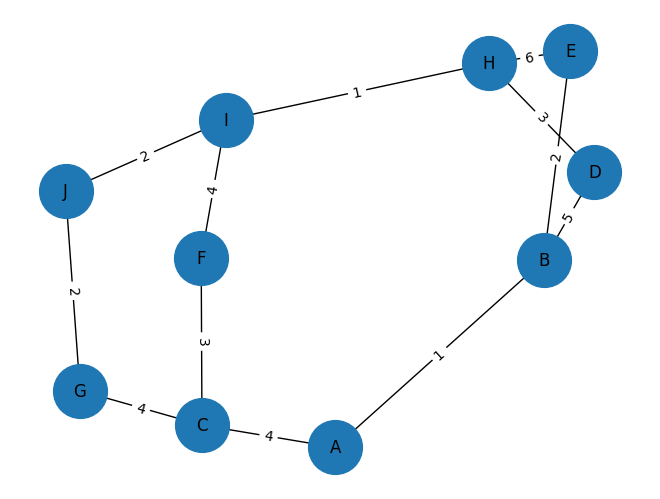

A* Search: ['A', 'C', 'G', 'J'] Costo: 10


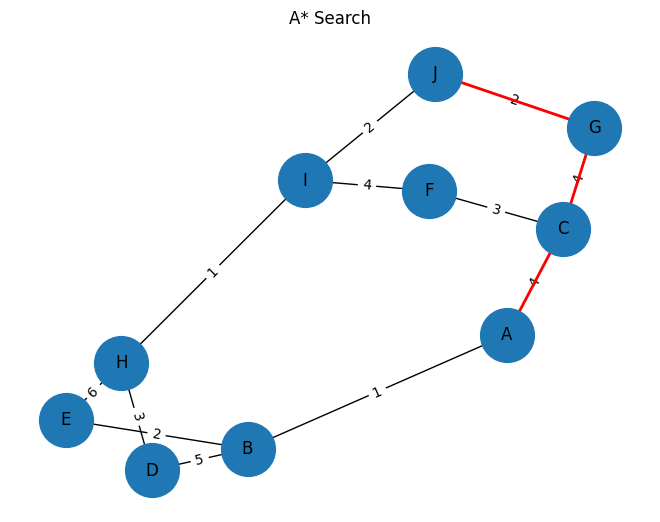

In [9]:
def a_star_search(G, start, goal, heuristic):
    visited = set()
    queue = PriorityQueue()
    queue.put((0, start, [], 0))  

    while not queue.empty():
        (f, node, path, g) = queue.get()

        if node in visited:
            continue

        visited.add(node)
        path = path + [node]

        if node == goal:
            return path, g

        for neighbor in G.neighbors(node):
            g_new = g + G[node][neighbor]['weight']
            f_new = g_new + heuristic[neighbor]
            queue.put((f_new, neighbor, path, g_new))

    return None, float('inf')

G = nx.Graph()
edges = [('A', 'B', 1), ('A', 'C', 4), ('B', 'D', 5), ('B', 'E', 2), 
         ('C', 'F', 3), ('C', 'G', 4), ('D', 'H', 3), ('E', 'H', 6), 
         ('F', 'I', 4), ('G', 'J', 2), ('H', 'I', 1), ('I', 'J', 2)]
G.add_weighted_edges_from(edges)

mostrar_grafo(G)

heuristica = {
    'A': 7, 'B': 6, 'C': 3, 'D': 5, 'E': 4,
    'F': 2, 'G': 1, 'H': 3, 'I': 1, 'J': 0
}

path, cost = a_star_search(G, 'A', 'J', heuristica)
print("A* Search:", path, "Costo:", cost)
visualizar_resultado(G, path, "A* Search")

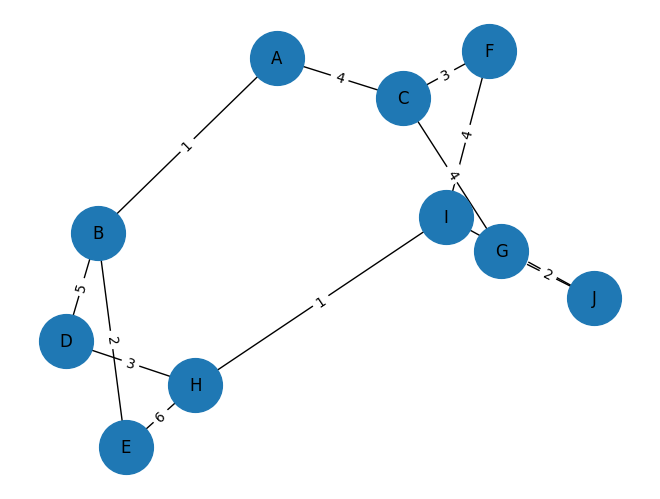

A* Graph Search: ['A', 'C', 'G', 'J'] Costo: 10


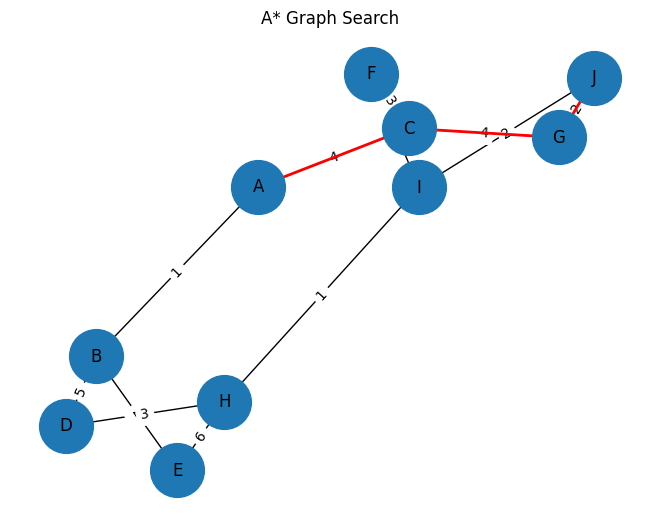

In [10]:
def a_star_graph_search(G, start, goal, heuristic):
    visited = set()
    queue = PriorityQueue()
    queue.put((0 + heuristic[start], start, [], 0))  
    g_costs = {start: 0}  

    while not queue.empty():
        (f, node, path, g) = queue.get()

        if node in visited:
            continue

        visited.add(node)
        path = path + [node]

        if node == goal:
            return path, g

        for neighbor in G.neighbors(node):
            g_new = g + G[node][neighbor]['weight']
            
            if neighbor not in g_costs or g_new < g_costs[neighbor]:
                g_costs[neighbor] = g_new
                f_new = g_new + heuristic[neighbor]
                queue.put((f_new, neighbor, path, g_new))

    return None, float('inf')


G = nx.Graph()
edges = [('A', 'B', 1), ('A', 'C', 4), ('B', 'D', 5), ('B', 'E', 2),
        ('C', 'F', 3), ('C', 'G', 4), ('D', 'H', 3), ('E', 'H', 6),
        ('F', 'I', 4), ('G', 'J', 2), ('H', 'I', 1), ('I', 'J', 2)]
G.add_weighted_edges_from(edges)

mostrar_grafo(G)


heuristica = {
    'A': 7, 'B': 6, 'C': 3, 'D': 5, 'E': 4,
    'F': 2, 'G': 1, 'H': 3, 'I': 1, 'J': 0
}

path, cost = a_star_graph_search(G, 'A', 'J', heuristica)
print("A* Graph Search:", path, "Costo:", cost)
visualizar_resultado(G, path, "A* Graph Search")